# Regresión lineal para predicción de progresión de diabetes
- age: Representa la edad del paciente, normalizada (no es la edad real, sino una representación estandarizada).
- sex: Sexo del paciente, representado como una variable numérica normalizada (valores entre -0.5 y 0.5).
- bmi: Índice de Masa Corporal (Body Mass Index, BMI), una medida del peso relativo al cuadrado de la altura.
- bp:
Promedio de presión arterial (Blood Pressure, BP), normalizada.
- s1: Nivel sérico de lípidos totales (colesterol total).
- s2: Nivel sérico de lipoproteínas de baja densidad (LDL, “colesterol malo”).
- s3: Nivel sérico de lipoproteínas de alta densidad (HDL, “colesterol bueno”).
- s4: Relación entre el colesterol total y HDL.
- s5: Nivel sérico de triglicéridos, representado como una medida numérica normalizada.
- s6: Nivel sérico de glucosa en ayuno, una medida clave en el monitoreo de la diabetes.

In [11]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Cargar el conjunto de datos
diabetes_data = load_diabetes()

# Convertir el conjunto de datos a un DataFrame para facilitar su manipulación
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target  # Agregar la variable objetivo al DataFrame

# Mostrar las primeras filas del DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
# 4. Separar características (X) y variable objetivo (y)
X = df.drop(columns=["target"])
y = df["target"]


In [6]:
# 5. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 6. Escalar las características (mejora estabilidad del modelo)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
# 7. Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# 8. Realizar predicciones
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [16]:
# 9. Evaluar el modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [17]:
# 10. Resultados
print(f"RMSE (Entrenamiento): {rmse_train:.2f}")
print(f"RMSE (Prueba): {rmse_test:.2f}")
print(f"R2 (Entrenamiento): {r2_train:.2f}")
print(f"R2 (Prueba): {r2_test:.2f}")


RMSE (Entrenamiento): 53.56
RMSE (Prueba): 53.85
R2 (Entrenamiento): 0.53
R2 (Prueba): 0.45


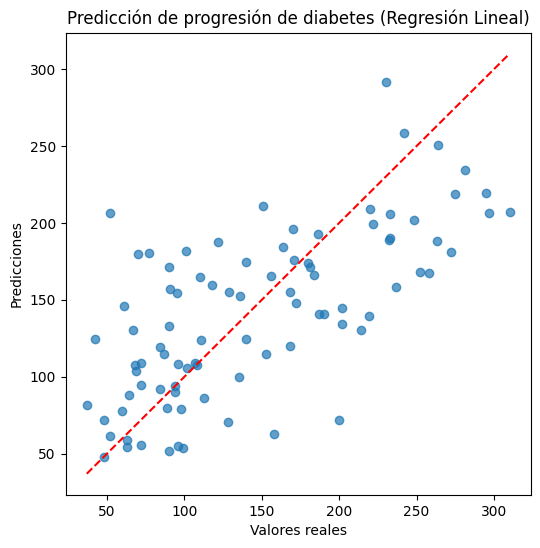

In [18]:
# 11. Visualizar resultados
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción de progresión de diabetes (Regresión Lineal)")
plt.show()